In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:0000:0100:01


In [3]:
df=pd.read_csv('/kaggle/input/movie-data/movie_data_full_final.csv')

In [4]:
df.isnull().sum()

Title                0
Year                 0
Runtime (Minutes)    0
Genre                0
IMDB                 0
Metascore            0
Description          0
Director             0
Stars                0
Votes                0
Gross ($)            0
dtype: int64

In [5]:
df = df.sample(frac=1, random_state=11)
df.reset_index(drop=True, inplace=True)
df.head()

,Title,Year,Runtime (Minutes),Genre,IMDB,Metascore,Description,Director,Stars,Votes,Gross ($)
0,Titus,1999,162,"Drama, History, Thriller",7.1,57.0,"Titus returns victorious from war, only to pla...",Julie Taymor,"Anthony Hopkins,Jessica Lange,Osheen Jones,Dar...",21133,1921350
1,Lady Macbeth,2016,89,"Drama, Romance",6.8,76.0,"In 19th-century rural England, a young bride w...",William Oldroyd,"Florence Pugh,Cosmo Jarvis,Paul Hilton,Naomi A...",25616,1129408
2,It's a Disaster,2012,88,"Comedy, Drama",6.4,57.0,"Four couples meet for Sunday brunch, then disc...",Todd Berger,"Rachel Boston,Laura Adkin,Kevin M. Brennan,Dav...",11446,38100
3,Last Life in the Universe,2003,112,"Comedy, Drama, Romance",7.5,73.0,"A suicidal, obsessively compulsive Japanese li...",Pen-Ek Ratanaruang,"Tadanobu Asano,Sinitta Boonyasak,Takashi Miike...",11411,31747
4,The Boss of It All,2006,99,Comedy,6.6,71.0,An IT company hires an actor to serve as the c...,Lars von Trier,"Jens Albinus,Peter Gantzler,Friðrik Þór Friðri...",12227,51300


# Correlation Matrix Analysis

In data analysis, understanding the relationships between variables is crucial. A correlation matrix provides insights into how numerical features in the dataset are related to one another. In movie success factor analysis, the correlation matrix was calculated for the following numerical attributes: 'Year', 'Runtime (Minutes)', 'IMDB', 'Metascore', 'Votes', and 'Gross ($)'.

Let's take a closer look at the correlation coefficients:

- **Year vs. Other Attributes:**
    - The 'Year' feature has a negative correlation with 'IMDB' (-0.196) and 'Metascore' (-0.193). This suggests that as the release year of a movie increases, its IMDb rating and Metascore tend to decrease slightly. 
    - 'Year' has a positive but weak correlation with 'Votes' (0.087) and 'Gross ($)' (0.107), implying that more recent movies tend to accumulate slightly higher votes and gross earnings.
    - There is a very weak negative correlation (-0.062) between 'Year' and 'Runtime (Minutes)', indicating a minor decrease in movie runtime over the years.

- **Runtime (Minutes) vs. Other Attributes:**
    - 'Runtime (Minutes)' has a positive correlation with 'IMDB' (0.387), 'Metascore' (0.263), 'Votes' (0.314), and 'Gross ($)' (0.241). This suggests that longer movies tend to have higher IMDb and Metascore ratings, more votes, and potentially higher gross earnings.

- **IMDB vs. Other Attributes:**
    - 'IMDB' is positively correlated with 'Metascore' (0.736) and 'Votes' (0.409), indicating that movies with higher IMDb ratings tend to also have higher Metascores and accumulate more votes.

- **Metascore vs. Other Attributes:**
    - 'Metascore' has a positive correlation with 'Votes' (0.256), suggesting that movies with higher Metascores tend to receive more votes.

- **Votes vs. Gross ($):**

    - 'Votes' and 'Gross ($)' show a strong positive correlation (0.624), indicating that movies with more votes tend to have higher gross earnings.

Understanding these correlations can help identify potential factors that contribute to a movie's success, such as runtime, ratings, and audience engagement. Let's further explore these relationships in the analysis.


/tmp/ipykernel_32/1578005850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

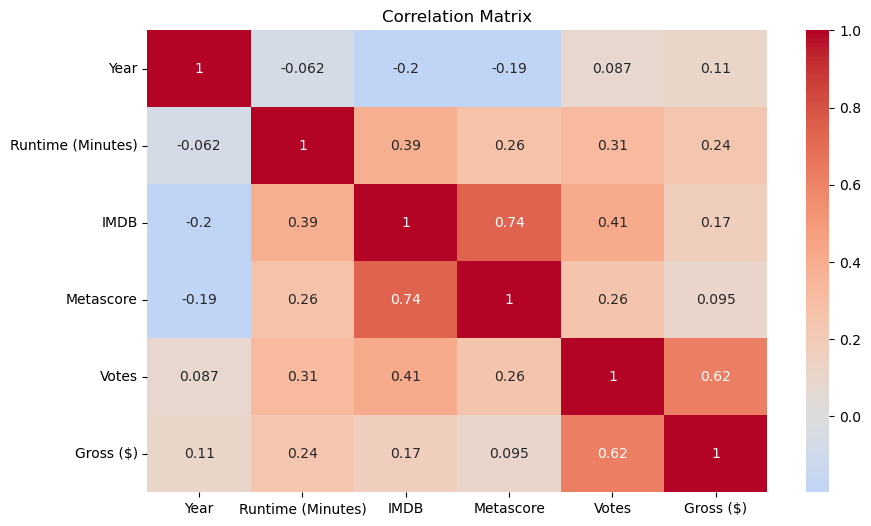

In [6]:
correlation_matrix=df.corr()
fig=plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, center=0, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')

In [7]:
df.describe()

,Year,Runtime (Minutes),IMDB,Metascore,Votes,Gross ($)
count,7484.000000,7484.000000,7484.000000,7484.000000,7.484000e+03,7.484000e+03
mean,2001.169294,108.032469,6.475227,56.014431,1.079655e+05,3.924894e+07
std,14.764599,18.625935,0.935469,17.767322,1.918049e+05,6.614114e+07
min,1916.000000,63.000000,1.300000,1.000000,5.005000e+03,1.450000e+02
25%,1994.000000,95.000000,5.900000,44.000000,1.557500e+04,2.491459e+06
50%,2005.000000,105.000000,6.500000,56.000000,4.099950e+04,1.662513e+07
75%,2012.000000,117.000000,7.100000,69.000000,1.132320e+05,4.698697e+07
max,2022.000000,366.000000,9.300000,100.000000,2.787706e+06,9.366622e+08


# Number of Movies Released Over the Years

In this analysis of the trend in movie releases over time, a line plot has been created to depict the number of movies released each year. This analysis aids in understanding the historical pattern of movie production.

- **X-axis**: Year (1916-2022)
- **Y-axis**: Number of Movies Released (Count)

From the line plot, the following trends are observed:

- Throughout the years, there has been a generally upward trend in the number of movies released. This suggests a growth in the film industry, with an increasing number of movies entering the market.

- However, an interesting anomaly emerges in the years 2020-2021. During this period, a sharp decline in the number of movies released is noticeable. This significant drop can be attributed to the global COVID-19 pandemic, which disrupted film production schedules and resulted in delays and cancellations in the industry.

Further analysis may provide insights into the repercussions of this decline in movie releases on other factors such as box office earnings and audience preferences.



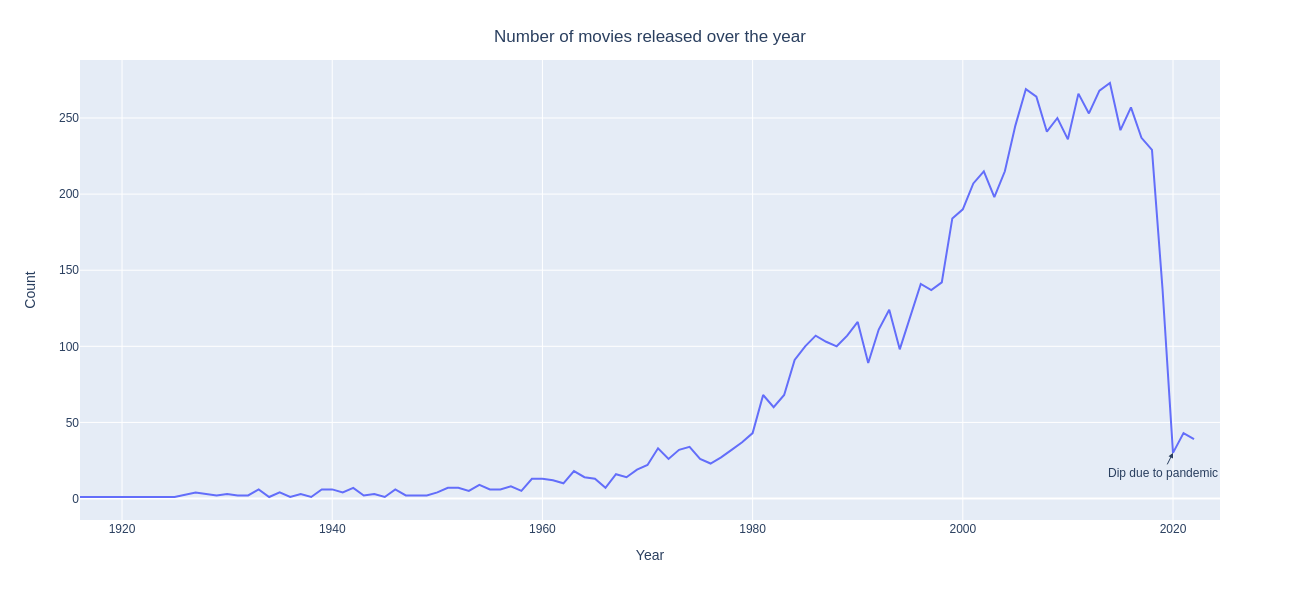

In [8]:
fig=px.line(df.groupby('Year').count().reset_index(), x='Year', y='Title')
fig.update_layout(xaxis_title='Year',
                 yaxis_title='Count',
                 title=dict(x=0.5, y=0.95, text='Number of movies released over the year'))
fig.add_annotation(x=2020, y=30, text='Dip due to pandemic', showarrow=True, arrowhead=2,ay=20)
fig.update_layout(width=1300, height=600)
fig.show(renderer='png')

# Revenue Over the Years

In this analysis of movie revenue trends, a bar plot displays the total revenue generated by movies in 3-year intervals. This approach provides a clearer view of revenue trends over time, allowing for the identification of significant changes.


- **X-axis**: Years
- **Y-axis**: Revenue (Billion Dollars)

From the bar plot, one can observe the following patterns:

- There is a consistent upward trend in movie revenue over the years, indicating the overall growth of the film industry. This suggests that, on average, movies have been generating more revenue as time progresses.

- However, a noteworthy anomaly appears during the 2020-2022 interval. Here, a significant dip in movie revenue is observed. This decline can be attributed to the widespread impact of the COVID-19 pandemic, which disrupted the film industry by causing theater closures, production delays, and reduced audience attendance.

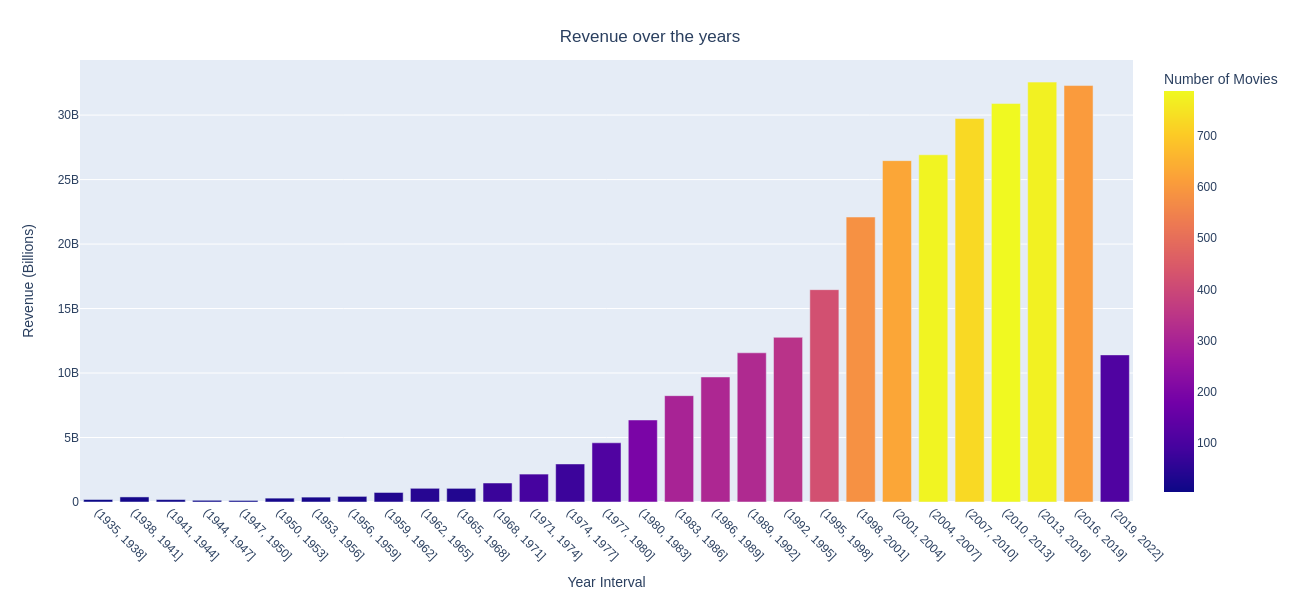

In [9]:
data=df.groupby(pd.cut(df['Year'], bins=range(1935,2023,3)).astype(str)).agg({'Gross ($)':'sum', 'Title':'count'}).reset_index()
data=data.iloc[:-1]
fig=px.bar(data, x='Year', y='Gross ($)', color='Title')
fig.update_layout(xaxis_title='Year Interval',
                 yaxis_title='Revenue (Billions)',
                 title=dict(x=0.5,y=0.95, text='Revenue over the years'),
                 coloraxis_colorbar_title='Number of Movies')
fig.update_layout(width=1300, height=600)
fig.update_xaxes(tickangle=45)
fig.show(renderer='png')

# Top 10 Movies at the US Box Office

In this analysis, a bar graph showcasing the top 10 movies with the highest box office collections in the United States. The box office figures are represented on the x-axis (Gross Earnings in Million Dollars), movie titles are on the y-axis, and the color of the markers represents the number of Votes received.

Here are the top 10 movies by US box office earnings:

- **Star Wars: Episode VII - The Force Awakens**
    - Gross Earnings: $936,662,225
    - Votes: 954,497

- **Avengers: Endgame**
    - Gross Earnings: $858,373,000
    - Votes: 1,207,434

- **Spider-Man: No Way Home**
    - Gross Earnings: $804,747,988
    - Votes: 824,858

- **Avatar**
    - Gross Earnings: $760,507,625
    - Votes: 1,358,149

- **Top Gun: Maverick**
    - Gross Earnings: $718,732,821
    - Votes: 623,686

- **Black Panther**
    - Gross Earnings: $700,059,566
    - Votes: 812,287

- **Avengers: Infinity War**
    - Gross Earnings: $678,815,482
    - Votes: 1,148,784

- **Avatar: The Way of Water**
    - Gross Earnings: $659,682,302
    - Votes: 451,108

- **Titanic**
    - Gross Earnings: $659,325,379
    - Votes: 1,242,847

- **Jurassic World**
    - Gross Earnings: $652,270,625
    - Votes: 663,598

The color of the markers represents the number of Votes received, with darker colors indicating higher levels of audience engagement. These movies have not only achieved significant box office success but have also garnered substantial viewer appreciation, as reflected in the number of Votes.


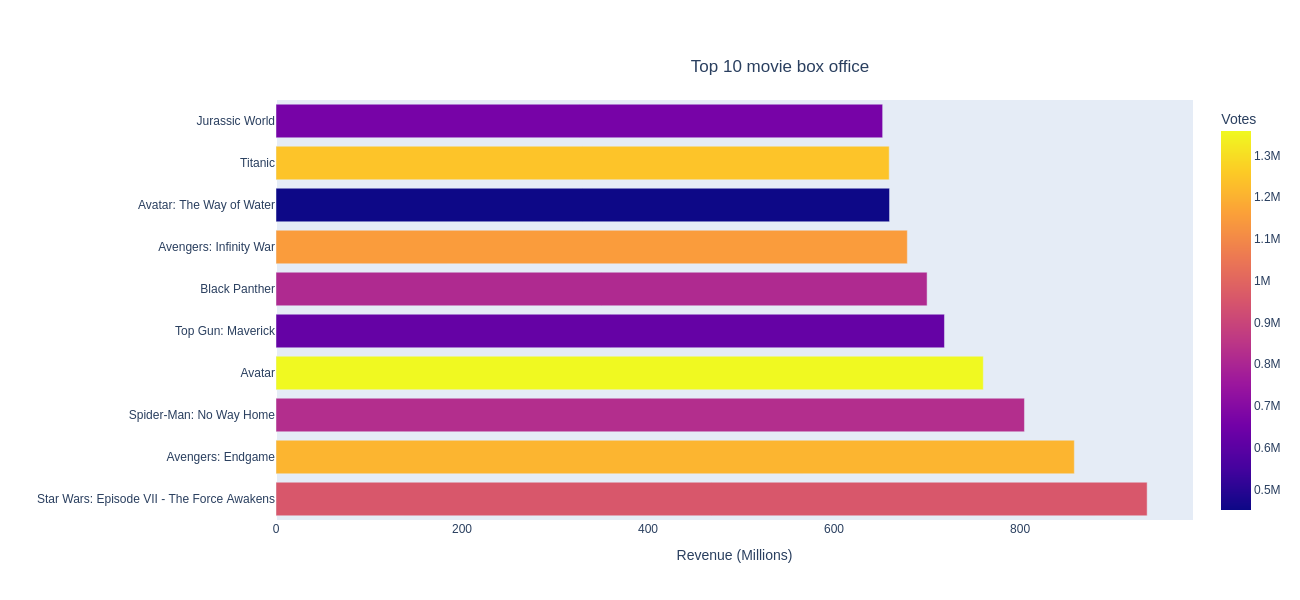

In [10]:
top10_movies=df.sort_values(ascending=False,by='Gross ($)')[0:10]
fig=px.bar(top10_movies, y='Title', x='Gross ($)', title='Top 10 movie box office', color='Votes',color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='Revenue (Millions)',
                  yaxis_title='',
                  title=dict(x=0.6, y=0.9, text='Top 10 movie box office'),
                  width=1200,
                  height=700
                    )
y_ticks=np.arange(0,11,2)*1e8
labels=[f"{i*1e-6:.0f}" for i in y_ticks]
fig.update_xaxes(tickvals=y_ticks,
                  ticktext=labels,
                  showgrid=False)
fig.update_layout(width=1300, height=600)
fig.show(renderer='png')

# Regression Plot: Votes vs. Revenue

In this analysis, a regression plot to explore the relationship between the number of Votes received by movies and their respective Revenue. This visualization helps us understand how audience engagement, as measured by Votes, correlates with the financial success of movies.

- **X-axis**: Number of Votes
- **Y-axis**: Revenue (Dollars)

From the regression plot, we can observe the following insights:

- There is a strong positive correlation (correlation coefficient: 0.62) between the number of Votes received by movies and their Revenue. This indicates that movies with higher audience engagement, as reflected in the number of Votes, tend to generate higher revenue.

- As the number of Votes increases, there is a noticeable upward trend in Revenue. This suggests that movies that resonate with a larger audience not only receive more Votes but also tend to perform better at the box office.

This correlation between Votes and Revenue underscores the significance of audience feedback and engagement in the success of movies. It implies that movies with higher viewer ratings and participation are more likely to achieve higher financial returns.


Text(0.5, 0, 'Number of Votes')

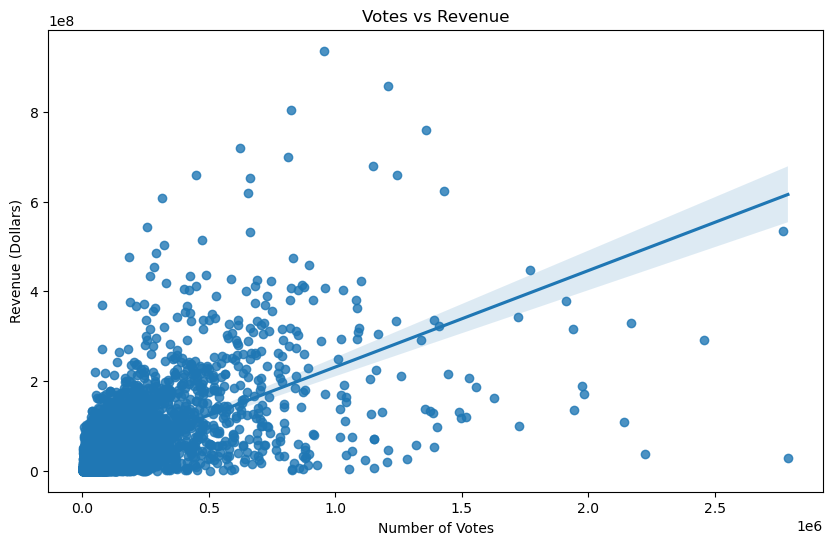

In [11]:
fig=plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Votes', y='Gross ($)')
plt.title('Votes vs Revenue')
plt.ylabel('Revenue (Dollars)')
plt.xlabel('Number of Votes')

# Top Movies by Ratings

In this analysis, a bar graph showcasing the top movies based on their ratings. The movies are ranked by their IMDb ratings (x-axis), with Metascore values represented by the color of the markers. Each bar corresponds to a movie title (y-axis).

- **X-axis**: IMDb Rating
- **Y-axis**: Movie Title
- **Marker Color**: Metascore

Here are the top movies ranked by IMDb rating:

- **The Shawshank Redemption**
    - IMDb Rating: 9.3
    - Metascore: 82

- **The Godfather**
    - IMDb Rating: 9.2
    - Metascore: 100

- **The Dark Knight**
    - IMDb Rating: 9.0
    - Metascore: 84

- **12 Angry Men**
    - IMDb Rating: 9.0
    - Metascore: 97

- **The Lord of the Rings: The Return of the King**
    - IMDb Rating: 9.0
    - Metascore: 94

- **The Godfather Part II**
    - IMDb Rating: 9.0
    - Metascore: 90

- **Schindler's List**
    - IMDb Rating: 9.0
    - Metascore: 95

- **Pulp Fiction**
    - IMDb Rating: 8.9
    - Metascore: 95

- **Forrest Gump**
    - IMDb Rating: 8.8
    - Metascore: 82

- **The Lord of the Rings: The Two Towers**
    - IMDb Rating: 8.8
    - Metascore: 87

The color of the markers represents the Metascore, with darker colors indicating higher Metascore ratings. These ratings reflect both critical acclaim and IMDb ratings, providing a comprehensive view of each movie's quality.



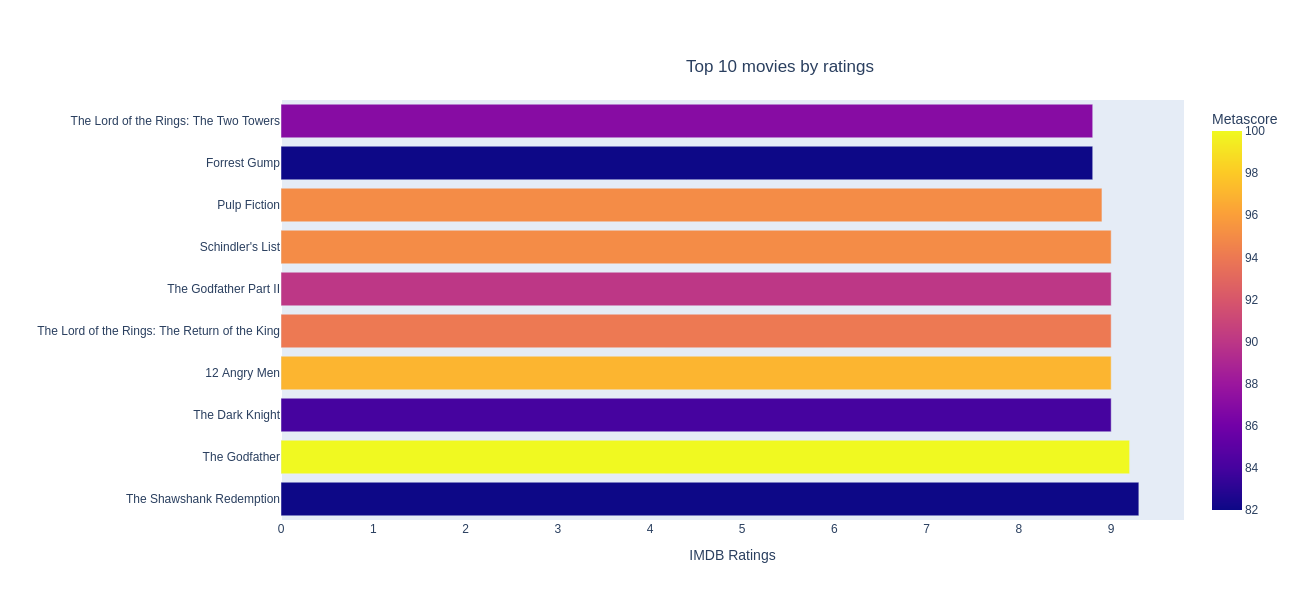

In [12]:
top10=df.sort_values(ascending=False, by='IMDB')[0:10]
fig=px.bar(top10, y='Title', x='IMDB', title='Top 10 movies by ratings', color='Metascore', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='IMDB Ratings',
                  yaxis_title='',
                  title=dict(x=0.6, y=0.9, text='Top 10 movies by ratings'),
                  width=1200,
                  height=700
                    )
fig.update_xaxes(showgrid=False)
fig.update_layout(width=1300, height=600)
fig.show(renderer='png')

In [13]:
genres=', '.join(df['Genre'])
unique_genres=set(genres.split(', '))
genre_counts={genre:0 for genre in unique_genres}
for genre in unique_genres:
    genre_counts[genre]=genres.split(', ').count(genre)
genre_counts=dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

# Movie Genre Distribution

In this analysis, a vertical bar graph illustrates the distribution of movie genres based on the count of movies within each genre. The x-axis represents different movie genres, while the y-axis displays the number of movies in each genre.

- **X-axis**: Genre
- **Y-axis**: Movie Count

Here is the distribution of movie genres:

- **Drama**: 4,205 movies
- **Comedy**: 2,996 movies
- **Action**: 1,745 movies
- **Crime**: 1,463 movies
- **Romance**: 1,411 movies
- **Adventure**: 1,385 movies
- **Thriller**: 1,143 movies
- **Horror**: 809 movies
- **Mystery**: 725 movies
- **Fantasy**: 571 movies
- **Biography**: 560 movies
- **Sci-Fi**: 539 movies
- **Family**: 404 movies
- **Animation**: 344 movies
- **Music**: 273 movies
- **History**: 244 movies
- **Sport**: 187 movies
- **War**: 154 movies
- **Musical**: 87 movies
- **Western**: 70 movies
- **Film-Noir**: 14 movies

This visualization provides an overview of the distribution of movies across various genres, allowing for insights into the popularity of different genres within the dataset.


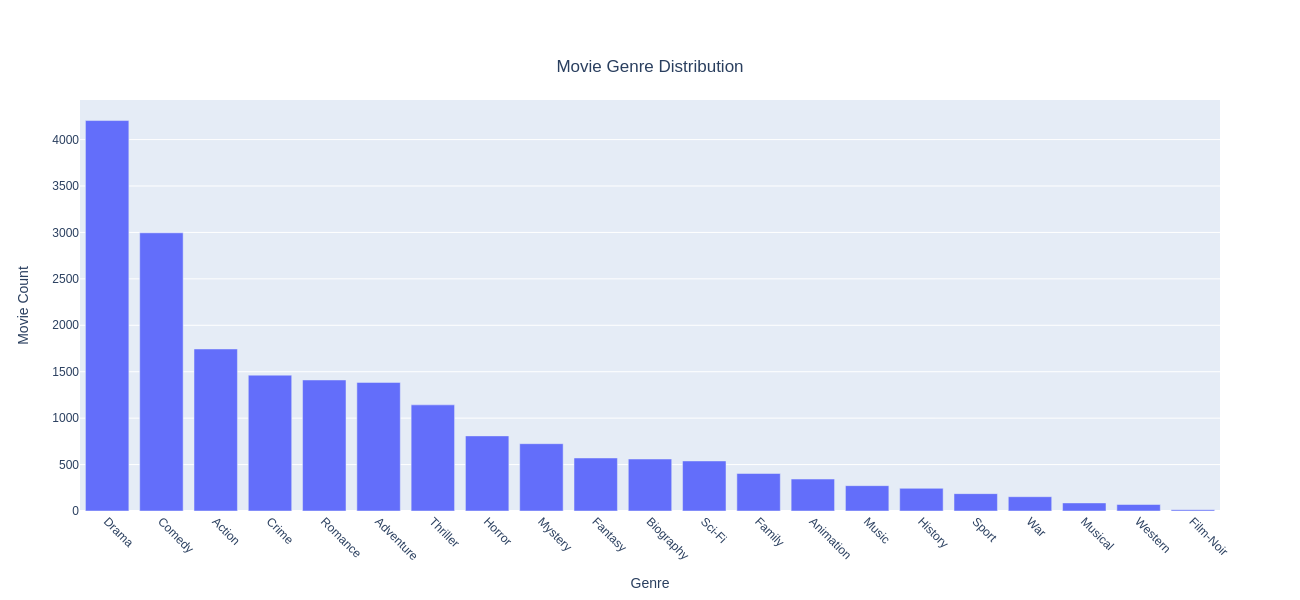

In [14]:
fig = px.bar(x=genre_counts.keys(), y=genre_counts.values(), title='Movie Genre Distribution', labels={'x':'Genre', 'y':'Movie Count'})
fig.update_layout(title=dict(x=0.5,y=0.9))
fig.update_layout(width=1300, height=600)
fig.update_xaxes(tickangle=45)
fig.show(renderer='png')

In [15]:
directors=', '.join(df['Director'])
unique_directors=set(directors.split(', '))
director_counts={director:0 for director in unique_directors}
for director in director_counts:
    director_counts[director]=directors.split(', ').count(director)

In [16]:
director_counts=dict(sorted(director_counts.items(), key=lambda item: item[1], reverse=True))

# Top Directors

This vertical bar graph displays the filmography of top directors, showing the count of movies directed by each director. The x-axis represents different directors, and the y-axis represents the number of movies directed by each director.

- **X-axis**: Director
- **Y-axis**: Movie Count

Here is the filmography of some directors:

- **Clint Eastwood**: 38 movies
- **Woody Allen**: 36 movies
- **Steven Spielberg**: 32 movies
- **Ridley Scott**: 27 movies
- **Martin Scorsese**: 24 movies
- **Steven Soderbergh**: 24 movies
- **Ron Howard**: 24 movies
- **Brian De Palma**: 21 movies
- **Walter Hill**: 20 movies
- **Spike Lee**: 20 movies
- **Tyler Perry**: 19 movies
- **Tim Burton**: 19 movies
- **Barry Levinson**: 19 movies
- **Wes Craven**: 19 movies
- **Richard Linklater**: 19 movies
- **Joel Schumacher**: 18 movies
- **Joel Coen**: 18 movies
- **Robert Zemeckis**: 18 movies
- **Francis Ford Coppola**: 17 movies
- **Stephen Frears**: 17 movies
- **Gus Van Sant**: 17 movies
- **Rob Reiner**: 17 movies
- **Robert Altman**: 17 movies
- **Oliver Stone**: 17 movies
- **Ethan Coen**: 16 movies
- **Robert Rodriguez**: 16 movies
- **Sidney Lumet**: 16 movies
- **Tony Scott**: 15 movies
- **Alfred Hitchcock**: 15 movies
- **Garry Marshall**: 15 movies
- **Richard Donner**: 15 movies
- **Renny Harlin**: 15 movies
- **Sam Raimi**: 15 movies
- **David Cronenberg**: 15 movies
- **Ivan Reitman**: 15 movies

This visualization provides an overview of the filmography of popular directors within the dataset, highlighting the number of movies they have directed.


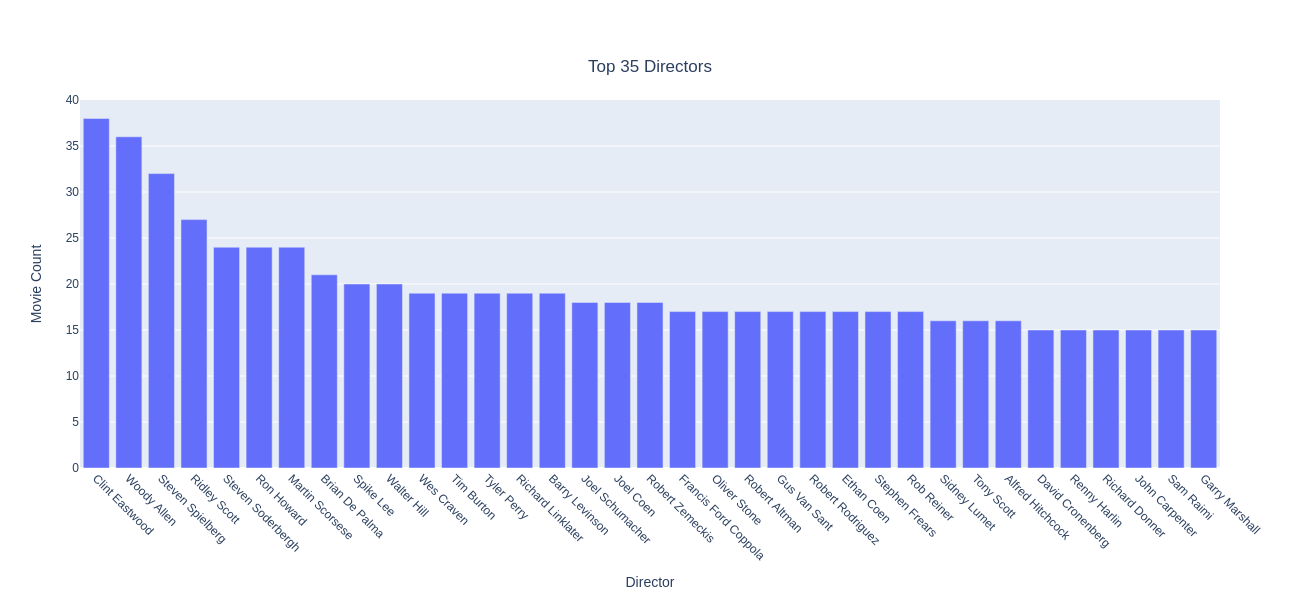

In [17]:
fig = px.bar(x=list(director_counts.keys())[0:35], y=list(director_counts.values())[0:35], labels={'x': 'Director', 'y': 'Movie Count'}, title='Top 35 Directors')
fig.update_layout(title=dict(x=0.5,y=0.9))
fig.update_layout(width=1300, height=600)
fig.update_xaxes(tickangle=45)
fig.show(renderer='png')

In [18]:
director_revenue = {}
for index, row in df.iterrows():
    directors = row['Director'].split(', ')
    gross = row['Gross ($)']
    share_per_director = gross / len(directors)
    for director in directors:
        if director in director_revenue:
            director_revenue[director] += share_per_director
        else:
            director_revenue[director] = share_per_director
director_revenue=dict(sorted(director_revenue.items(), key=lambda item: item[1], reverse=True))

In [19]:
director_data={}
for director in director_counts:
    director_data[director]=[director_revenue[director],director_counts[director]]
director_data=pd.DataFrame.from_dict(director_data,orient='index')

In [20]:
director_data.columns=['Revenue', 'Count']

# Movie Box Office by Top Directors

This bar graph illustrates the relationship between the total revenue generated at the box office and the number of movies directed by top directors. Each bar represents a director, and the color of the bar indicates the count of movies they've directed.

- **X-axis**: Director Name
- **Y-axis**: Revenue (in billions)

Here are some key observations from the graph:

- Director **Clint Eastwood** has the highest number of movies directed, however, despite directing a large number of films, Clint Eastwood's total box office revenue is not the highest among the directors.

- Director **Steven Spielberg** stands out as the leader in terms of total box office revenue, despite directing fewer movies compared to Clint Eastwood.

- Director **Woody Allen** and **Ridley Scott** have also directed a significant number of movies but have lower total box office revenue compared to Spielberg.

This graph highlights the intriguing dynamic between the number of movies directed by a director and their box office success. While Clint Eastwood boasts the most extensive filmography, it's Steven Spielberg who emerges as the leader in terms of box office earnings, showcasing the diverse trajectories of these accomplished directors in the film industry.


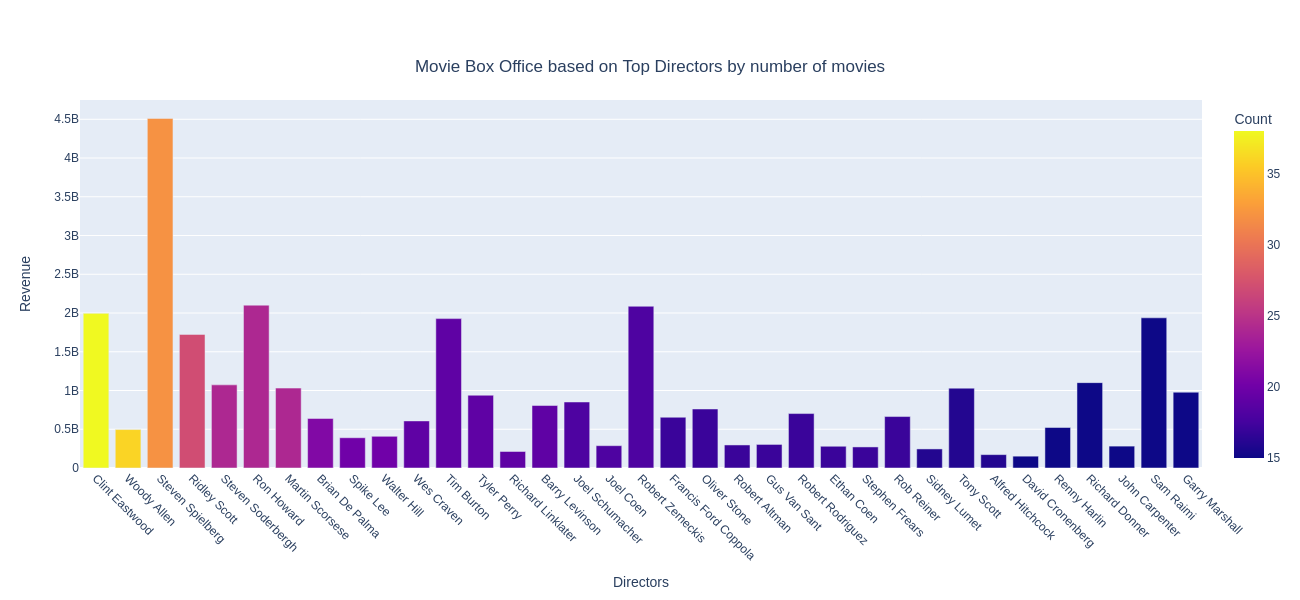

In [21]:
fig=px.bar(director_data.head(35), x=director_data.index[0:35], y='Revenue', color='Count', labels={'x':'Directors'},title='Movie Box Office based on Top Directors by number of movies')
fig.update_layout(title=dict(x=0.5,y=0.9))
fig.update_layout(width=1300, height=600)
fig.update_xaxes(tickangle=45)
fig.show(renderer='png')

In [22]:
stars=','.join(df['Stars'])
unique_stars=set(stars.split(','))
stars_counts={star:0 for star in unique_stars}
for star in stars_counts:
    stars_counts[star]=stars.split(',').count(star)

In [23]:
stars_counts=dict(sorted(stars_counts.items(), key=lambda item: item[1], reverse=True))

# Top Movie Stars by Filmography

This vertical bar graph depicts the top movie stars based on the count of movies in which they have starred. The x-axis represents different movie stars, and the y-axis displays the number of movies each star has appeared in.

- **X-axis**: Star
- **Y-axis**: Movie Count

Here are the top movie stars ranked by their filmography:

- **Robert De Niro**: 74 movies
- **Nicolas Cage**: 56 movies
- **Samuel L. Jackson**: 56 movies
- **Bruce Willis**: 51 movies
- **Tom Hanks**: 50 movies
- **Morgan Freeman**: 49 movies
- **Dennis Quaid**: 48 movies
- **Johnny Depp**: 46 movies
- **Julianne Moore**: 46 movies
- **Nicole Kidman**: 45 movies
- **Liam Neeson**: 45 movies
- **Woody Harrelson**: 44 movies
- **Ewan McGregor**: 43 movies
- **John Cusack**: 43 movies
- **Matt Damon**: 42 movies
- **Meryl Streep**: 42 movies
- **Robin Williams**: 42 movies
- **Matthew McConaughey**: 42 movies
- **Mark Wahlberg**: 42 movies
- **Michael Caine**: 41 movies
- **Clint Eastwood**: 41 movies
- **Ethan Hawke**: 41 movies
- **Cate Blanchett**: 40 movies
- **John Travolta**: 40 movies
- **Robert Downey Jr.**: 40 movies
- **Willem Dafoe**: 40 movies
- **Julia Roberts**: 40 movies
- **Denzel Washington**: 39 movies
- **Brad Pitt**: 39 movies
- **Harrison Ford**: 39 movies

This visualization provides an overview of the filmography of top movie stars within the dataset, highlighting the number of movies they have starred in.


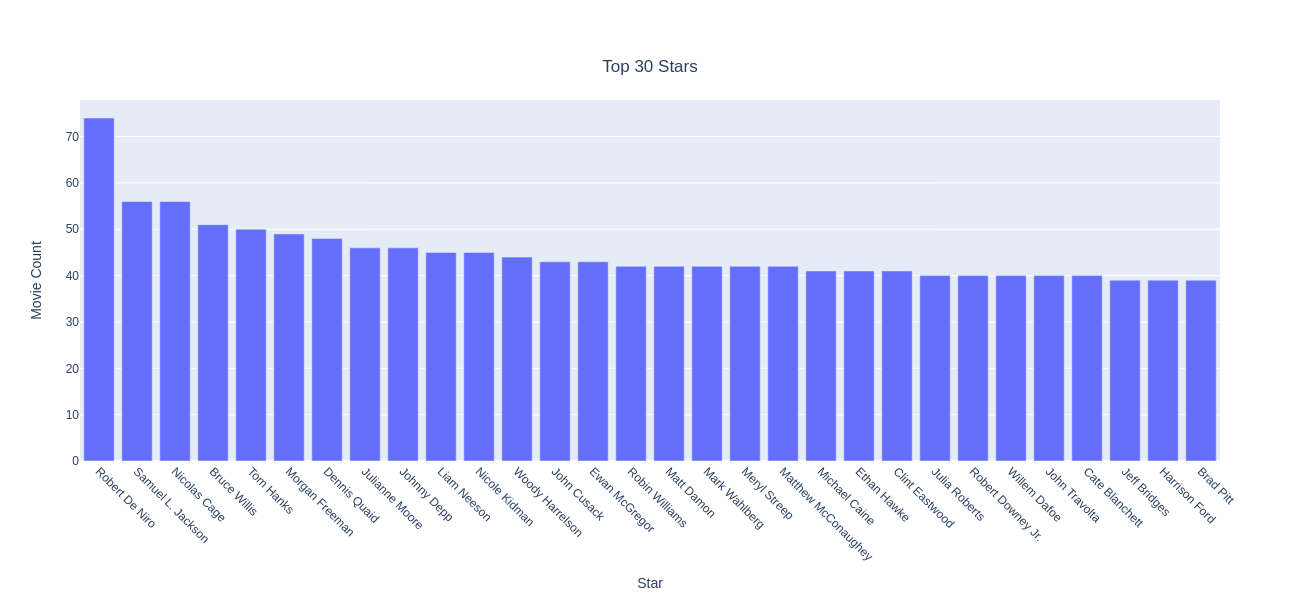

In [24]:
fig= px.bar(x=list(stars_counts.keys())[0:30], y=list(stars_counts.values())[0:30], labels={'x': 'Star', 'y': 'Movie Count'}, title='Top 30 Stars')
fig.update_layout(title=dict(x=0.5,y=0.9))
fig.update_layout(width=1300, height=600)
fig.update_xaxes(tickangle=45)
fig.show(renderer='png')

In [25]:
star_revenue={}
for index,row in df.iterrows():
    stars=row['Stars'].split(',')
    gross=row['Gross ($)']
    gross_per_star=gross/len(stars)
    for star in stars: 
        if star in star_revenue:
            star_revenue[star]+=gross_per_star
        else:
            star_revenue[star]=gross_per_star

In [26]:
star_data={}
for star in stars_counts:
    star_data[star]=[star_revenue[star], stars_counts[star]]
star_data=pd.DataFrame.from_dict(star_data, orient='index')

In [27]:
star_data.columns=['Revenue', 'Count']

# Movie Box Office by Top Stars

This bar graph illustrates the relationship between the total box office revenue and the number of movies starred in by top actors. Each bar represents an actor, and the color of the bar indicates the count of movies they've starred in.

- **X-axis**: Actor Name
- **Y-axis**: Revenue (in billions)

Here are some key observations from the graph:

- Actor **Robert De Niro** has the highest number of movies in which he has starred, showcasing an extensive filmography.

- Similar to the directors case, despite starring in numerous movies, Robert De Niro's total box office revenue is not the highest among the actors.

- Actor **Robert Downey Jr.** despite starring in fewer movies compared to some others, stands out as the leader in terms of total box office revenue.

- Other actors such as **Samuel L. Jackson**, **Tom Hanks**, and **Morgan Freeman** have also starred in a substantial number of movies but have varying levels of box office success.

This graph highlights the interesting dynamic between the number of movies an actor makes and their box office success. While Robert De Niro boasts the most extensive filmography, it's Robert Downey Jr who emerges as the leader in terms of box office earnings, showcasing the diverse trajectories of these accomplished actors in the film industry.


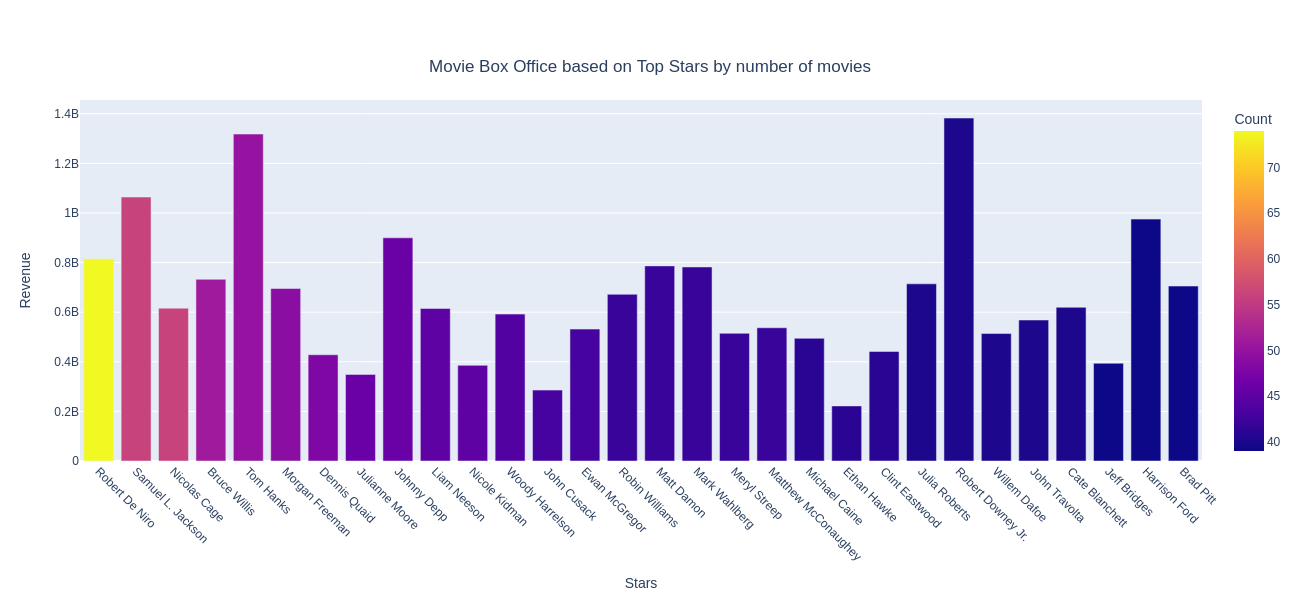

In [28]:
fig=px.bar(star_data.head(30), x=star_data.index[0:30], y='Revenue', color='Count',labels={'x':'Stars'}, title='Movie Box Office based on Top Stars by number of movies')
fig.update_layout(title=dict(x=0.5,y=0.9))
fig.update_layout(width=1300, height=600)
fig.update_xaxes(tickangle=45)
fig.show(renderer='png')

In [29]:
from wordcloud import WordCloud, STOPWORDS

# Word Cloud of Movie Descriptions

This word cloud visually represents the most frequent words found in movie descriptions. The size of each word corresponds to its frequency in the dataset, with larger words appearing more frequently.

Here are some of the prominent words in movie descriptions:

- **life**: 100% frequency
- **love**: 52.17% frequency
- **world**: 50.82% frequency
- **friend**: 50.27% frequency
- **live**: 48.51% frequency
- **help**: 43.21% frequency
- **discover**: 37.23% frequency
- **story**: 36.01% frequency
- **team**: 34.92% frequency
- **murder**: 32.88% frequency
- **American**: 31.66% frequency
- **home**: 30.71% frequency
- **meet**: 29.35% frequency
- **way**: 27.58% frequency
- **mysterious**: 27.17% frequency
- **turn**: 27.17% frequency
- **save**: 26.63% frequency
- **day**: 26.63% frequency
- **order**: 26.49% frequency
- **back**: 26.49% frequency
- **begin**: 26.49% frequency
- **will**: 26.22% frequency
- **relationship**: 25.95% frequency
- **time**: 25.27% frequency
- **falls**: 24.73% frequency
- **town**: 24.18% frequency
- **former**: 24.05% frequency
- **high school**: 24.05% frequency
- **return**: 23.78% frequency
- **death**: 23.78% frequency
- **people**: 23.23% frequency

This word cloud provides a quick glimpse into the common themes and topics found in movie descriptions within the dataset. It highlights the words that appear most frequently, giving an idea of the prevalent themes in these movies.


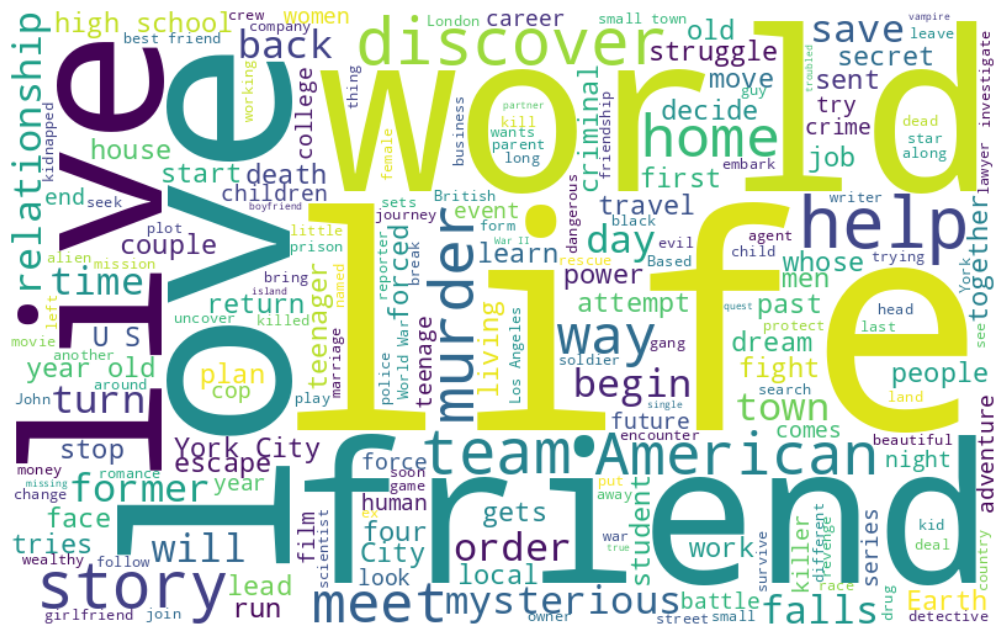

In [30]:
words=['find', 'come', 'take', 'now', 'keep', 'go', 'want', 'goes', 'may', 'new', 'must', 'become',
       'becomes', 'use','one','two', 'man', 'woman', 'family', 'finds', 'young', 'set', 'group', 'father', 'mother', 'daughter',
      'son', 'make', 'three', 'wife', 'husband', 'boy', 'girl', 'brother', 'sister', 'fall', 'takes']
stopwords=STOPWORDS.union(words)
wordcloud=WordCloud(width=800,height=500, background_color='white', stopwords=stopwords).generate(' '.join(df['Description']))
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()